### Let us start by importing necessary libraries and data

In [32]:
# this will help in making the Python code more structured automatically (good coding practice)
#%load_ext nb_black

import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)

from varname import nameof
# Libraries different ensemble classifiers
from sklearn.ensemble import (
   
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
   
)

from xgboost import XGBClassifier

# Libraries to get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)
import shap
# To tune different models
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from plot_metric.functions import BinaryClassification

# Import Dataset

In [2]:
df = pd.read_csv('final_data.csv',index_col=0) ##  Fill the blank to read the data


### View the first and last 5 rows of the dataset

In [3]:
df.head(2) 

,Urine_-_Density,Urine_-_Red_blood_cells,Relationship_(Patient_Normal),Myelocytes,Segmented,Promyelocytes,Lactic_Dehydrogenase,Creatine_phosphokinase (CPK),International_normalized_ratio_(INR),pCO2_(venous_blood_gas_analysis),Base_excess_(venous_blood_gas_analysis),Gamma-glutamyltransferase,Indirect_Bilirubin,Direct_Bilirubin,Serum_Glucose,Alanine_transaminase,Aspartate_transaminase,Sodium,Potassium,Urea,Proteina_C_reativa_mg_dL,Neutrophils,Mean_platelet_volume_,Monocytes,Mean_corpuscular_hemoglobin_concentration (MCHC),Platelets,Red_blood_Cells,Lymphocytes,Red_blood_cell_distribution_width_(RDW),Basophils,Eosinophils,Urine_-_Hemoglobin,Urine_-_Crystals,Strepto_A,"Influenza_A,_rapid_test","Influenza_B,_rapid_test",Parainfluenza_1,Parainfluenza_4,Coronavirus_HKU1,Rhinovirus_Enterovirus,Metapneumovirus,Bordetella_pertussis,Inf_A_H1N1_2009,CoronavirusOC43,Coronavirus229E,CoronavirusNL63,Adenovirus,Chlamydophila_pneumoniae,Parainfluenza_3,Influenza_B,Respiratory_Syncytial_Virus,Influenza_A,"Patient_addmited_to_intensive_care_unit_(1=yes,_0=no)","Patient_addmited_to_semi-intensive_unit_(1=yes,_0=no)","Patient_addmited_to_regular_ward_(1=yes,_0=no)",SARS-Cov-2_exam_result
0,-0.581777,-0.193024,-0.167030,-0.233126,0.505584,-0.102062,-0.063551,0.052357,-0.285485,0.530603,0.163518,0.004708,0.002705,-0.003205,0.317945,-0.039466,-0.151140,0.092412,0.047300,-0.056675,-0.392581,-0.435288,0.411366,-0.347808,-0.353321,-0.119024,0.648545,-0.112960,-0.056424,-0.180130,-0.365955,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.034461,-0.162212,-0.102405,-0.233126,-0.171908,-0.102062,-0.490837,-0.110828,-0.730092,-0.074222,0.236329,-0.150917,0.002705,-0.003205,-0.140648,-0.370242,-0.455281,0.862512,-0.305787,1.198059,-0.147895,-0.619086,0.010677,0.357547,-0.950790,-0.517413,0.102004,0.318366,-0.625073,-0.223767,1.482158,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df.head(2) 

,Urine_-_Density,Urine_-_Red_blood_cells,Relationship_(Patient_Normal),Myelocytes,Segmented,Promyelocytes,Lactic_Dehydrogenase,Creatine_phosphokinase (CPK),International_normalized_ratio_(INR),pCO2_(venous_blood_gas_analysis),Base_excess_(venous_blood_gas_analysis),Gamma-glutamyltransferase,Indirect_Bilirubin,Direct_Bilirubin,Serum_Glucose,Alanine_transaminase,Aspartate_transaminase,Sodium,Potassium,Urea,Proteina_C_reativa_mg_dL,Neutrophils,Mean_platelet_volume_,Monocytes,Mean_corpuscular_hemoglobin_concentration (MCHC),Platelets,Red_blood_Cells,Lymphocytes,Red_blood_cell_distribution_width_(RDW),Basophils,Eosinophils,Urine_-_Hemoglobin,Urine_-_Crystals,Strepto_A,"Influenza_A,_rapid_test","Influenza_B,_rapid_test",Parainfluenza_1,Parainfluenza_4,Coronavirus_HKU1,Rhinovirus_Enterovirus,Metapneumovirus,Bordetella_pertussis,Inf_A_H1N1_2009,CoronavirusOC43,Coronavirus229E,CoronavirusNL63,Adenovirus,Chlamydophila_pneumoniae,Parainfluenza_3,Influenza_B,Respiratory_Syncytial_Virus,Influenza_A,"Patient_addmited_to_intensive_care_unit_(1=yes,_0=no)","Patient_addmited_to_semi-intensive_unit_(1=yes,_0=no)","Patient_addmited_to_regular_ward_(1=yes,_0=no)",SARS-Cov-2_exam_result
0,-0.581777,-0.193024,-0.167030,-0.233126,0.505584,-0.102062,-0.063551,0.052357,-0.285485,0.530603,0.163518,0.004708,0.002705,-0.003205,0.317945,-0.039466,-0.151140,0.092412,0.047300,-0.056675,-0.392581,-0.435288,0.411366,-0.347808,-0.353321,-0.119024,0.648545,-0.112960,-0.056424,-0.180130,-0.365955,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.034461,-0.162212,-0.102405,-0.233126,-0.171908,-0.102062,-0.490837,-0.110828,-0.730092,-0.074222,0.236329,-0.150917,0.002705,-0.003205,-0.140648,-0.370242,-0.455281,0.862512,-0.305787,1.198059,-0.147895,-0.619086,0.010677,0.357547,-0.950790,-0.517413,0.102004,0.318366,-0.625073,-0.223767,1.482158,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Check the data types of the columns for the dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5644 entries, 0 to 5643
Data columns (total 56 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Urine_-_Density                                        5644 non-null   float64
 1   Urine_-_Red_blood_cells                                5644 non-null   float64
 2   Relationship_(Patient_Normal)                          5644 non-null   float64
 3   Myelocytes                                             5644 non-null   float64
 4   Segmented                                              5644 non-null   float64
 5   Promyelocytes                                          5644 non-null   float64
 6   Lactic_Dehydrogenase                                   5644 non-null   float64
 7   Creatine_phosphokinase (CPK)                           5644 non-null   float64
 8   International_normalized_ratio_(INR)            

## Exploratory Data Analysis

In [6]:
X=df.drop('SARS-Cov-2_exam_result',axis=1)
Y=df['SARS-Cov-2_exam_result']

In [7]:

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,Y, random_state=1, test_size=0.3, stratify=Y) 

In [8]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3950, 55)
Shape of test set :  (1694, 55)
Percentage of classes in training set:
0.0    0.901013
1.0    0.098987
Name: SARS-Cov-2_exam_result, dtype: float64
Percentage of classes in test set:
0.0    0.901417
1.0    0.098583
Name: SARS-Cov-2_exam_result, dtype: float64


### Model evaluation criterion

Model can make wrong predictions as:

1. Model predicts that a patient will test positive but in reality, the patient tests negative.
2. Model predicts that a patient will test negative but in reality, the patient tests positive.

Which case is more important? 

In health domain reducing the false negative is more important. If a patient tests negative when it had to be positive a patient will go back to family and community to spread the virus. 


How to reduce the losses?

 `Recall Score` can be used as the metric for evaluation of the model, greater the Recall score are the chances of minimizing False Negatives. 



#### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The model_performance_classification_sklearn function will be used to check the model performance of models. 
* The confusion_matrix_sklearn function will be used to plot the confusion matrix.

# Functions

In [16]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification_sklearn(model, predictors, target,Type='Training',threshold=0.5):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    type: train,or test
    """

    # predicting using the independent variables
    pred_bool = model.predict_proba(predictors)[:,1]> threshold
    pred=pred_bool.astype(int)
    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[Type],
    )

    return df_perf

In [17]:
def remove_correlated_features(x, threshold):
    '''
    Objective:
        Remove collinear features in a dataframe with a correlation coefficient
        greater than the threshold. Removing collinear features can help a model 
        to generalize and improves the interpretability of the model.

    Inputs: 
        x: features dataframe
        threshold: features with correlations greater than this value are removed

    Output: 
        dataframe that contains only the non-highly-collinear features
    '''

    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i+1):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)

            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    print(drops)
    x = x.drop(columns=drops)

    return x

In [18]:
def  classification_threshold_finding(model,predictors,target): 
    """ 
    Specificity=precision
    Sensitivty = TPR(True Positive Rate)= Recall 
    1- Specificity = FPR(False Positive Rate)
    
    """  
    data={'threshold':[0],'tp':[0],'tn':[0],'fn':[0],'fp':[0],
          'TPR':[0],'FPR':[0],"Accuracy": [0], "Recall": [0],
          "Precision": [0], "F1":[0]}
    for i,threshold in enumerate(np.arange(0.1,1,0.1)):
        pred_bool = model.predict_proba(predictors)[:,1]> threshold
        pred=pred_bool.astype(int)
        tp=sum((target == 1) & (pred == 1))
        tn=sum((target == 0) & (pred == 0))
        fn=sum((target == 1) & (pred == 0))
        fp=sum((target == 0) & (pred == 1))
        total=tp+tn+fn+fp
        #print(tp,tn,fn,fp,total)
        try:
            accuracy=(tp + tn)/ float( tp + tn + fn + fp)
            recall= np.float((tp/ float( tp + fn)))
            precision= tp / float( tp + fp)
            f1= 2 * tp/ float(2*tp+fn+fp)
            fpr=float((fp/float(fp+tn)))
        except ZeroDivisionError:
            result = 0    
        data['threshold'].append(np.round(threshold,3))
        data['tp'].append(tp)
        data['tn'].append(tn)
        data['fn'].append(fn)
        data['fp'].append(fp)
        data['FPR'].append(fpr)
        data['TPR'].append(recall)
        data['Accuracy'].append(accuracy)        
        data['Recall'].append(recall)
        data['Precision'].append(precision)
        data['F1'].append(f1)

    return pd.DataFrame(data)             		

In [19]:
def confusion_matrix_sklearn(model, predictors, target,Type='Training',threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    pred=model.predict_proba(predictors)[:,1]> threshold
   
    y_pred =  pred.astype(int)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{}".format(txt)+"\n{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for txt,item in zip(['TN', 'FP', 'FN', 'TP'], cm.flatten())
        ]
    ).reshape(2, 2)

    fig=plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="",cmap='Spectral_r')
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.title(f"{Type} Data" )
    #names=str(model).split("(")[0]
    names=nameof(model)
    fig.savefig(f"confusion_{names}_{Type}.png",dpi=200)

# Logistic Regression 

In [425]:
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.metrics import RocCurveDisplay,roc_auc_score,plot_roc_curve,roc_curve,precision_recall_curve,plot_precision_recall_curve

In [442]:
score_metrics=metrics.make_scorer(metrics.recall_score)

In [447]:
model=LogisticRegressionCV(random_state=1,class_weight='balanced',penalty='l1',solver='liblinear',
                           Cs=[0.01,0.05,0.02,0.03],scoring=score_metrics ,verbose=1)
model.fit(X_train,y_train)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s finished


LogisticRegressionCV(Cs=[0.01, 0.05, 0.02, 0.03], class_weight='balanced',
                     penalty='l1', random_state=1,
                     scoring=make_scorer(recall_score), solver='liblinear',
                     verbose=1)

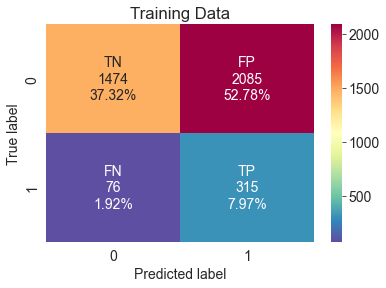

In [448]:

confusion_matrix_sklearn(model,X_train,y_train,'Training')


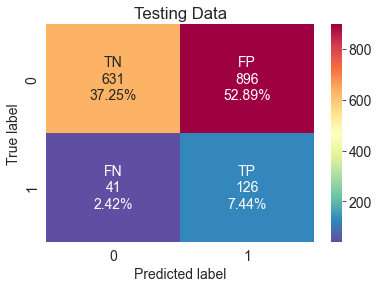

In [449]:
confusion_matrix_sklearn(model,X_test,y_test,'Testing')

In [450]:

lr_tuned_perf_train = model_performance_classification_sklearn(model,X_train,y_train,Type='Train') 
lr_tuned_perf_test = model_performance_classification_sklearn(model,X_test,y_test,Type='Test') 


<AxesSubplot:>

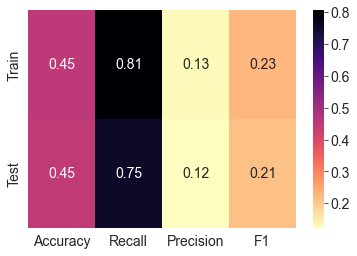

In [451]:

sns.heatmap(pd.concat([lr_tuned_perf_train,lr_tuned_perf_test]),cmap='magma_r',annot=True)

In [452]:
print(lr_tuned_perf_train)
print(lr_tuned_perf_test)

       Accuracy    Recall  Precision        F1
Train  0.452911  0.805627    0.13125  0.225726
      Accuracy    Recall  Precision        F1
Test  0.446871  0.754491   0.123288  0.211943


In [460]:
def Find_Optimal_Cutoff(target, predicted):
    

    fpr, tpr, threshold = roc_curve(target, predicted)
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.iloc[(roc.tf-0).abs().argsort()[:1]]

    return list(roc_t['threshold']) 

threshold = Find_Optimal_Cutoff(y_train,model.predict_proba(X_train)[:,1])
print(threshold)
# Find prediction to the dataframe applying threshold
y_predict_threshold = map((lambda x: 1 if x > threshold else 0),model.predict_proba(X_test)[:,1])
#list(y_predict_threshold)

[0.5452057393273426]


In [454]:
lr_perf_train_cutoff = model_performance_classification_sklearn(model,X_train,y_train,threshold) 
lr_perf_test_cutoff = model_performance_classification_sklearn(model,X_test,y_test,threshold) 
print(lr_perf_train_cutoff)
print(lr_perf_test_cutoff)

          Accuracy    Recall  Precision        F1
0.545119  0.452911  0.805627    0.13125  0.225726
          Accuracy    Recall  Precision        F1
0.545119  0.446871  0.754491   0.123288  0.211943


### threshold tunning

In [440]:
test_threshold=classification_threshold_finding(model,X_train,y_train)
test_threshold.index=test_threshold['threshold']

<AxesSubplot:xlabel='threshold'>

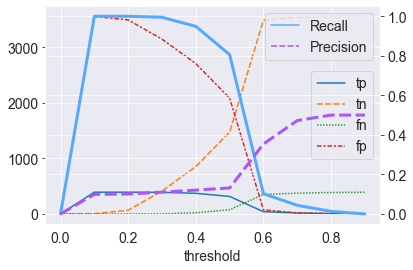

In [455]:
ff=sns.lineplot(data=test_threshold[['tp','tn','fn','fp']])
sns.lineplot(data=test_threshold[['Recall','Precision']],ax=ff.axes.twinx(),palette='cool',linewidth=3)

In [484]:
lr_perf_train_pr_threshold = model_performance_classification_sklearn(model,X_train,y_train,threshold=0.3,Type='Train') 
lr_perf_test_pr_threshold = model_performance_classification_sklearn(model,X_test,y_test,threshold=0.3,Type='Test') 
print(lr_perf_train_pr_threshold)
print(lr_perf_test_pr_threshold)

       Accuracy    Recall  Precision        F1
Train  0.202785  0.994885   0.110011  0.198116
      Accuracy    Recall  Precision        F1
Test  0.219008  0.994012   0.111559  0.200604


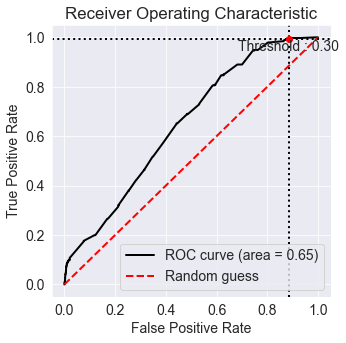

In [480]:

from plot_metric.functions import BinaryClassification
y_pred = model.predict_proba(X_train)[:,1]
bc = BinaryClassification(y_train, y_pred,labels=["Class 1", "Class 2"],threshold=0.3)

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve(threshold=0.3)
plt.show()

<AxesSubplot:>

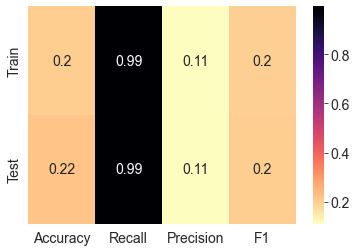

In [485]:
sns.heatmap(pd.concat([lr_perf_train_pr_threshold ,lr_perf_test_pr_threshold ]),cmap='magma_r',annot=True)

### Feature importance 

In [121]:
features_dic={'logit':model.coef_.flatten(),'Odd':np.exp(model.coef_).flatten(),'per_change_odd':100*(np.exp(model.coef_)-1).flatten()}
features_lr=pd.DataFrame(features_dic,index=model.feature_names_in_).sort_values(by='per_change_odd')

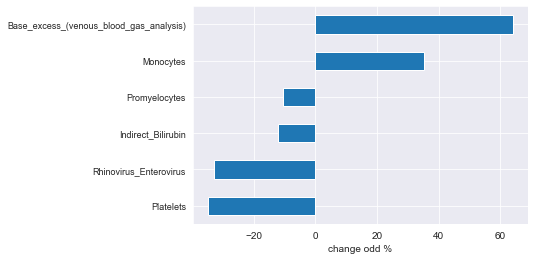

In [122]:
lr_features=features_lr[features_lr['per_change_odd'].abs()>0.000002]
features_lr[features_lr['per_change_odd'].abs()>0.0002].sort_values(by='per_change_odd')['per_change_odd'].plot.barh();
plt.yticks(fontsize=9);
plt.xlabel('change odd %');

In [123]:
features_lr[features_lr['per_change_odd'].abs()>0.0002].sort_values(by='per_change_odd')['per_change_odd']

Platelets                                 -34.793722
Rhinovirus_Enterovirus                    -32.751496
Indirect_Bilirubin                        -12.237224
Promyelocytes                             -10.485783
Monocytes                                  35.353427
Base_excess_(venous_blood_gas_analysis)    63.940404
Name: per_change_odd, dtype: float64

# Random Forest

In [124]:
# Fitting the model
rf_estimator = RandomForestClassifier(random_state=1,class_weight = 'balanced') 
rf_estimator.fit(X_train,y_train) 

RandomForestClassifier(class_weight='balanced', random_state=1)

#### Checking model performance on training set

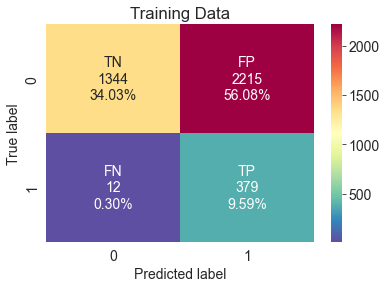

In [519]:
confusion_matrix_sklearn(rf_estimator,X_train,y_train,'Training',threshold=0.5) 

In [126]:
# Calculating different metrics
rf_estimator_model_train_perf = model_performance_classification_sklearn(rf_estimator,X_train,y_train)  
rf_estimator_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.567848,0.83376,0.16565,0.276388


#### Checking model performance on test set

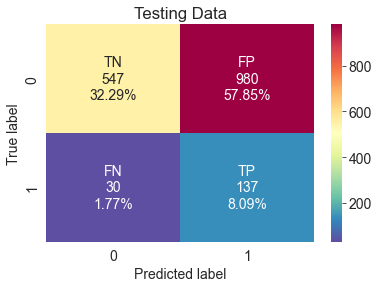

In [520]:
confusion_matrix_sklearn(rf_estimator,X_test,y_test,'Testing',threshold=0.5) 

In [128]:
rf_estimator_model_test_perf = model_performance_classification_sklearn(rf_estimator,X_test,y_test)
rf_estimator_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.545455,0.664671,0.134545,0.22379


### Hyperparameter Tuning - Random Forest

In [129]:
# Choose the type of classifier.
rf_tuned = RandomForestClassifier(random_state=1, oob_score=True, bootstrap=True,class_weight='balanced')

parameters = {
    "max_depth": list(np.arange(3, 15, 2)),
    "max_features": ["sqrt", "log2"],
    "min_samples_split": [5, 7],
    "n_estimators": np.arange(15, 50, 5),
}

# Type of scoring used to compare parameter combinations
acc_score = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned,param_grid=parameters,cv=5,n_jobs=-1,scoring=acc_score) 
grid_obj = grid_obj.fit(X_train,y_train) 

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=3,
                       min_samples_split=5, n_estimators=40, oob_score=True,
                       random_state=1)

#### Checking model performance on training set

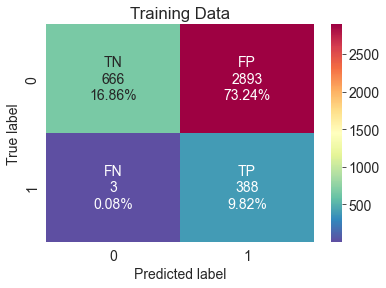

In [521]:
confusion_matrix_sklearn(rf_tuned,X_train,y_train,'Training',threshold=0.4) 

In [340]:
rf_tuned_model_train_perf = model_performance_classification_sklearn(rf_tuned,X_train,y_train)
rf_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
Training,0.379241,0.951407,0.13262,0.232791


#### Checking model performance on test set

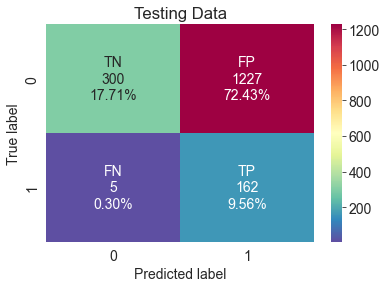

In [522]:
confusion_matrix_sklearn(rf_tuned,X_test,y_test,'Testing',threshold=0.4)

In [346]:
rf_tuned_model_test_perf = model_performance_classification_sklearn(rf_tuned,X_test,y_test,Type='Testing')
rf_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
Testing,0.37072,0.898204,0.125104,0.219619


<AxesSubplot:>

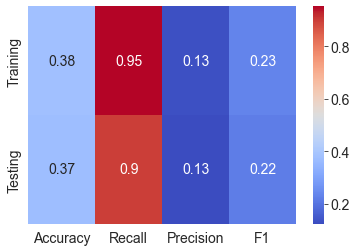

In [349]:
sns.heatmap(pd.concat([rf_tuned_model_train_perf,rf_tuned_model_test_perf]),cmap='coolwarm',annot=True)

### threshold Tunning 

<AxesSubplot:xlabel='threshold'>

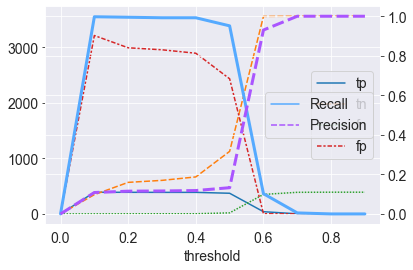

In [505]:
test_threshold=classification_threshold_finding(rf_tuned,X_train,y_train)
test_threshold.index=test_threshold['threshold']
ff=sns.lineplot(data=test_threshold[['tp','tn','fn','fp']])
sns.lineplot(data=test_threshold[['Recall','Precision']],ax=ff.axes.twinx(),palette='cool',linewidth=3)

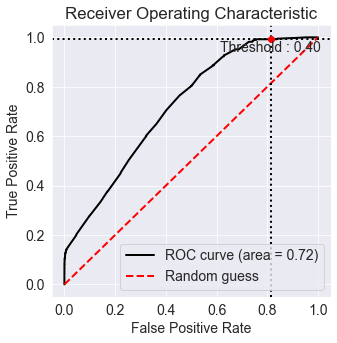

In [504]:
from plot_metric.functions import BinaryClassification
y_pred = rf_tuned.predict_proba(X_train)[:,1]
bc = BinaryClassification(y_train, y_pred,labels=["Class 1", "Class 2"],threshold=0.4)

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve(threshold=0.4)
plt.show()

In [502]:
rf_tuned_perf_train_threshold = model_performance_classification_sklearn(rf_tuned,X_train,y_train,threshold=0.4,Type='Train') 
rf_tuned_perf_test_threshold = model_performance_classification_sklearn(rf_tuned,X_test,y_test,threshold=0.4,Type='Test') 
print(rf_tuned_perf_train_threshold)
print(rf_tuned_perf_test_threshold)

       Accuracy    Recall  Precision        F1
Train  0.266835  0.992327   0.118257  0.211329
      Accuracy   Recall  Precision        F1
Test  0.272727  0.97006   0.116631  0.208226


<AxesSubplot:>

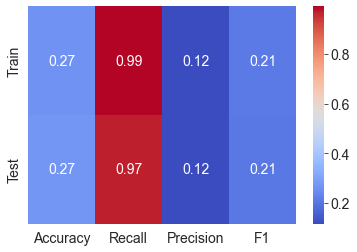

In [506]:
sns.heatmap(pd.concat([rf_tuned_perf_train_threshold,rf_tuned_perf_test_threshold]),cmap='coolwarm',annot=True)

# AdaBoost with Decision tree

In [201]:
ab_classifier = AdaBoostClassifier(random_state=1,base_estimator=DecisionTreeClassifier(class_weight='balanced'))
ab_classifier.fit(X_train,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced'),
                   random_state=1)

#### Checking model performance on training set

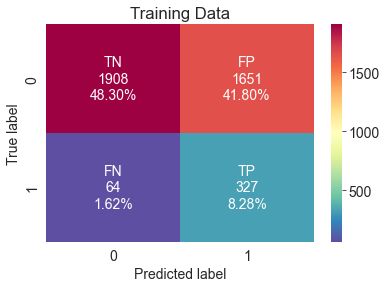

In [202]:
confusion_matrix_sklearn(ab_classifier,X_train,y_train,'Training') 

In [203]:
ab_classifier_model_train_perf = model_performance_classification_sklearn(ab_classifier,X_train,y_train)
ab_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.565823,0.836317,0.165319,0.276066


#### Checking model performance on testing set

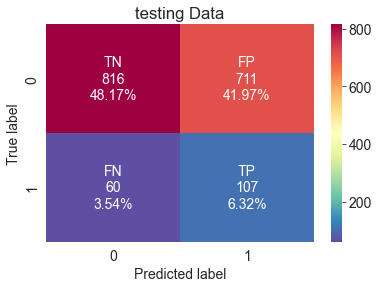

In [204]:
confusion_matrix_sklearn(ab_classifier,X_test,y_test,'testing') 

In [205]:
ab_classifier_model_test_perf = model_performance_classification_sklearn(ab_classifier,X_test,y_test) 
ab_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.544864,0.640719,0.130807,0.217259


### Hyperparameter Tuning Ada Boost 

In [142]:
# Choose the type of classifier.
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    'n_estimators': [100,200,500], 
    'base_estimator': [DecisionTreeClassifier(max_depth=1, class_weight="balanced"),
                                 DecisionTreeClassifier(max_depth=2, class_weight="balanced"),
                                                                  ],
              'learning_rate': np.arange(0.01, 1, 0.1),
              }


# Type of scoring used to compare parameter  combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = RandomizedSearchCV(abc_tuned,param_distributions=parameters,scoring=acc_scorer,cv=5,n_jobs=-1,n_iter=100) 
grid_obj = grid_obj.fit(X_train,y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                         max_depth=1),
                   learning_rate=0.01, n_estimators=100, random_state=1)

#### Checking model performance on training set

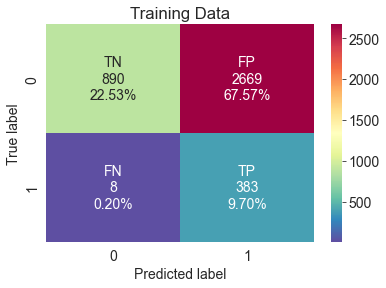

In [350]:
confusion_matrix_sklearn(abc_tuned,X_train,y_train,'Training') 

In [355]:
abc_tuned_model_train_perf = model_performance_classification_sklearn(abc_tuned,X_train,y_train,Type='Training') 
abc_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
Training,0.322278,0.97954,0.125491,0.22248


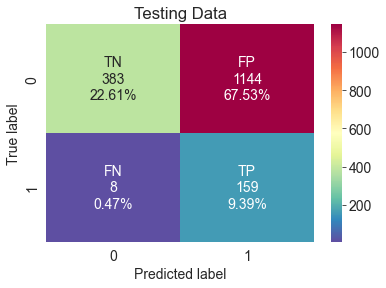

In [353]:
confusion_matrix_sklearn(abc_tuned,X_test,y_test,'Testing') 

#### Checking model performance on testing set

In [356]:
abc_tuned_model_test_perf = model_performance_classification_sklearn(abc_tuned,X_test,y_test,Type='Testing') 
abc_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
Testing,0.319953,0.952096,0.122026,0.216327


<AxesSubplot:>

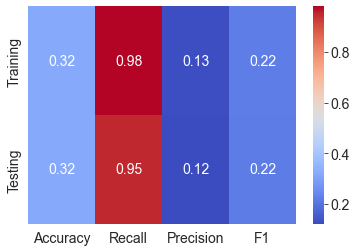

In [357]:
sns.heatmap(pd.concat([abc_tuned_model_train_perf,abc_tuned_model_test_perf]),cmap='coolwarm',annot=True)

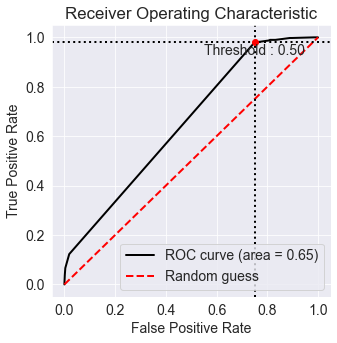

In [381]:
y_pred = abc_tuned.predict_proba(X_train)[:,1]
bc = BinaryClassification(y_train, y_pred,labels=["Class 1", "Class 2"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

### threshold Tuning

<AxesSubplot:xlabel='threshold'>

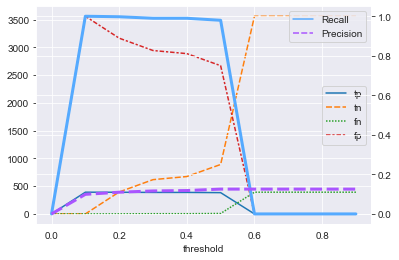

In [148]:
test_threshold=classification_threshold_finding(abc_tuned,X_train,y_train)
test_threshold.index=test_threshold['threshold']
ff=sns.lineplot(data=test_threshold[['tp','tn','fn','fp']])
sns.lineplot(data=test_threshold[['Recall','Precision']],ax=ff.axes.twinx(),palette='cool',linewidth=3)

In [487]:
lr_perf_train_pr_threshold = model_performance_classification_sklearn(abc_tuned,X_train,y_train,threshold=0.4,Type='Train') 
lr_perf_test_pr_threshold = model_performance_classification_sklearn(abc_tuned,X_test,y_test,threshold=0.4,Type='Test') 
print(lr_perf_train_pr_threshold)
print(lr_perf_test_pr_threshold)

       Accuracy   Recall  Precision        F1
Train  0.268354  0.98977    0.11824  0.211245
      Accuracy    Recall  Precision        F1
Test  0.272727  0.976048   0.117182  0.209243


# Gradient Boosting Classifier

In [12]:
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

#### Checking model performance on training set

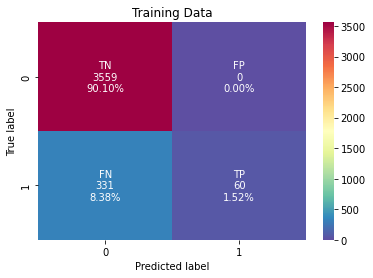

In [20]:
confusion_matrix_sklearn(gb_classifier,X_train,y_train,'Training') 

In [21]:
gb_classifier_model_train_perf = model_performance_classification_sklearn(gb_classifier,X_train,y_train) 
gb_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
Training,0.916203,0.153453,1.0,0.266075


#### Checking model performance on test set

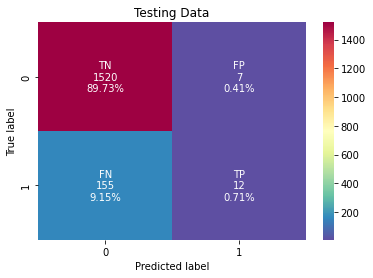

In [22]:
confusion_matrix_sklearn(gb_classifier,X_test,y_test,'Testing') 

In [23]:
gb_classifier_model_test_perf = model_performance_classification_sklearn(gb_classifier,X_test,y_test) 
gb_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
Training,0.904368,0.071856,0.631579,0.129032


### Hyperparameter Tuning - Gradient Boosting Classifier

In [36]:
# Choose the type of classifier.
gbc_tuned = GradientBoostingClassifier(
    init=DecisionTreeClassifier(max_depth=1, class_weight="balanced", random_state=1)
)

# Grid of parameters to choose from
parameters = {
    'n_estimators': [25,50, 100, 150, 200], 
              'max_depth': [3, 5, 10,20],
              'learning_rate': [0.1, 0.05, 0.01, 0.001],
              "max_features": [0.8, 0.9,0.7],
              "subsample": [0.9, 1,0.8],
              
              }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = RandomizedSearchCV(gbc_tuned,param_distributions=parameters,cv=5,n_jobs=-1,n_iter=50,scoring=acc_scorer) 
grid_obj = grid_obj.fit(X_train,y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=DecisionTreeClassifier(class_weight='balanced',
                                                       max_depth=1,
                                                       random_state=1),
                           learning_rate=0.001, max_depth=20, max_features=0.9,
                           n_estimators=50, subsample=0.9)

#### Checking model performance on training set

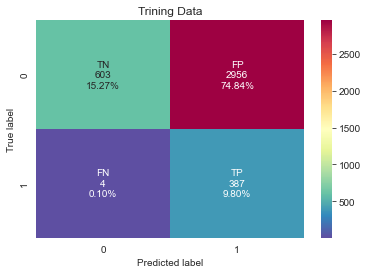

In [37]:
confusion_matrix_sklearn(gbc_tuned,X_train,y_train,'Trining')

In [38]:
gbc_tuned_model_train_perf = model_performance_classification_sklearn(gbc_tuned,X_train,y_train,threshold=0.5)
gbc_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
Training,0.250633,0.98977,0.115764,0.207284


#### Checking model performance on test set

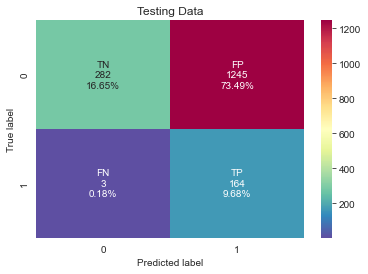

In [39]:
confusion_matrix_sklearn(gbc_tuned,X_test,y_test,'Testing') 

In [40]:
gbc_tuned_model_test_perf = model_performance_classification_sklearn(gbc_tuned,X_test,y_test,Type='Testing',threshold=0.5) 
gbc_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
Testing,0.263282,0.982036,0.116395,0.208122


<AxesSubplot:>

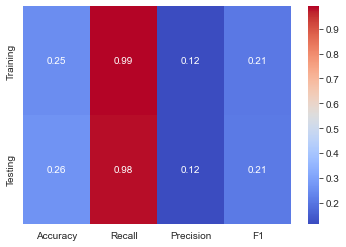

In [41]:
sns.heatmap(pd.concat([gbc_tuned_model_train_perf,gbc_tuned_model_test_perf]),cmap='coolwarm',annot=True)

### Threshold Tunning 

<AxesSubplot:xlabel='threshold'>

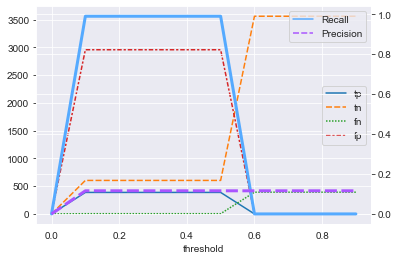

In [42]:
test_threshold=classification_threshold_finding(gbc_tuned,X_train,y_train)
test_threshold.index=test_threshold['threshold']
ff=sns.lineplot(data=test_threshold[['tp','tn','fn','fp']])
sns.lineplot(data=test_threshold[['Recall','Precision']],ax=ff.axes.twinx(),palette='cool',linewidth=3)

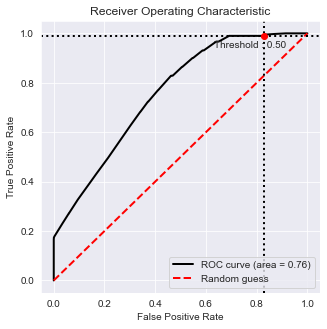

In [43]:
y_pred = gbc_tuned.predict_proba(X_train)[:,1]
bc = BinaryClassification(y_train, y_pred,labels=[0, 1])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve(threshold=0.5)
plt.show()

In [44]:
lr_perf_train_pr_threshold = model_performance_classification_sklearn(gbc_tuned,X_train,y_train,threshold=0.5,Type='Train') 
lr_perf_test_pr_threshold = model_performance_classification_sklearn(gbc_tuned,X_test,y_test,threshold=0.5,Type='Test') 
print(lr_perf_train_pr_threshold)
print(lr_perf_test_pr_threshold)

       Accuracy   Recall  Precision        F1
Train  0.250633  0.98977   0.115764  0.207284
      Accuracy    Recall  Precision        F1
Test  0.263282  0.982036   0.116395  0.208122


# XGBoost Classifier

In [161]:
Y.value_counts()


0.0    5086
1.0     558
Name: SARS-Cov-2_exam_result, dtype: int64

In [162]:
pose=5086/558
pose

9.114695340501791

In [222]:
xgb_classifier = XGBClassifier(random_state=1,scale_pos_weigh=10,n_jobs=0,eval_metric="logloss") 
xgb_classifier.fit(X_train,y_train) 

[16:58:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "scale_pos_weigh" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=6,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, ...)

#### Checking model performance on training set

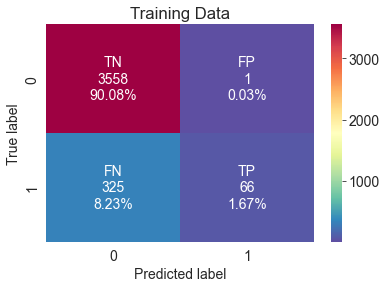

In [364]:
confusion_matrix_sklearn(xgb_classifier,X_train,y_train,'Training') 

In [365]:
xgb_classifier_model_train_perf = model_performance_classification_sklearn(xgb_classifier,X_train,y_train) 
xgb_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
Training,0.917468,0.168798,0.985075,0.28821


#### Checking model performance on test set

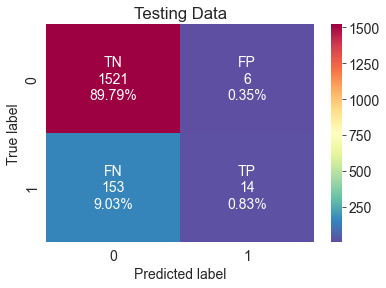

In [366]:
confusion_matrix_sklearn(xgb_classifier,X_test,y_test,'Testing') 

In [367]:
xgb_classifier_model_test_perf = model_performance_classification_sklearn(xgb_classifier,X_test,y_test)
xgb_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
Training,0.906139,0.083832,0.7,0.149733


### Hyperparameter Tuning - XGBoost Classifier

In [235]:
# Choose the type of classifier.
xgb_tuned = XGBClassifier(random_state=1, eval_metric="logloss")

# Grid of parameters to choose from
parameters = {
    "n_estimators": np.arange(150, 250, 50,),
    "scale_pos_weight": [1,8,10],
    "subsample": [0.9, 0.8,1],
    "learning_rate": np.arange(0.01, 0.8, 0.1),
    "gamma": [3, 5],
    "colsample_bytree": [0.8, 0.9],
    "colsample_bylevel": [ 0.9, 1],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = RandomizedSearchCV(xgb_tuned,param_distributions=parameters,cv=5,n_jobs=-1,n_iter=50,scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train,y_train) 

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.



XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.9,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', gamma=3, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.01, max_bin=256,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=6, max_leaves=0,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=150, n_jobs=0, num_parallel_tree=1, predictor='auto',
              random_state=1, reg_alpha=0, reg_lambda=1, ...)

In [263]:
xgb_tuned.set_params(**{"scale_pos_weight":11}).fit(X_train, y_train);

#### Checking model performance on training set

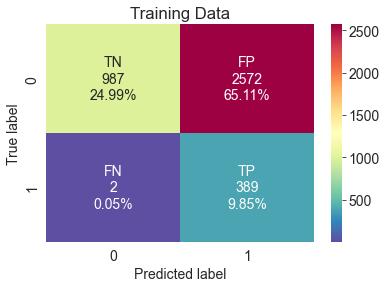

In [517]:
confusion_matrix_sklearn(xgb_tuned,X_train,y_train,'Training',threshold=0.4) 

In [371]:
xgb_tuned_model_train_perf = model_performance_classification_sklearn(xgb_tuned,X_train,y_train)
xgb_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
Training,0.398228,0.971867,0.138383,0.24227


#### Checking model performance on test set

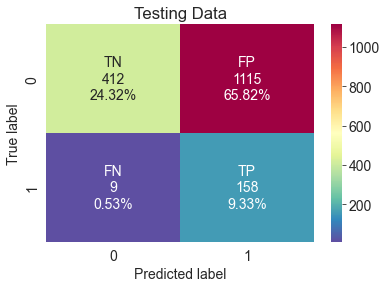

In [518]:
confusion_matrix_sklearn(xgb_tuned,X_test,y_test,'Testing',threshold=0.4) 

In [373]:
xgb_tuned_model_test_perf = model_performance_classification_sklearn(xgb_tuned,X_test,y_test,Type='Testing') 
xgb_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
Testing,0.381936,0.91018,0.128378,0.225019


<AxesSubplot:>

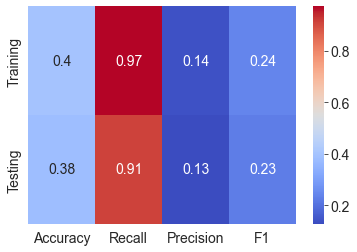

In [375]:
sns.heatmap(pd.concat([xgb_tuned_model_train_perf,xgb_tuned_model_test_perf]),cmap='coolwarm',annot=True)

### threshold Tunning

<AxesSubplot:xlabel='threshold'>

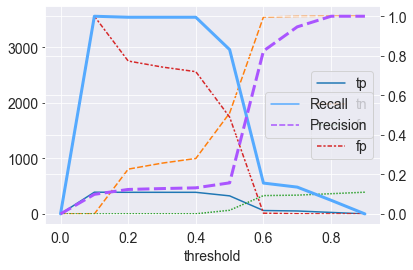

In [257]:
test_threshold=classification_threshold_finding(xgb_tuned,X_train,y_train)
test_threshold.index=test_threshold['threshold']
ff=sns.lineplot(data=test_threshold[['tp','tn','fn','fp']])
sns.lineplot(data=test_threshold[['Recall','Precision']],ax=ff.axes.twinx(),palette='cool',linewidth=3)

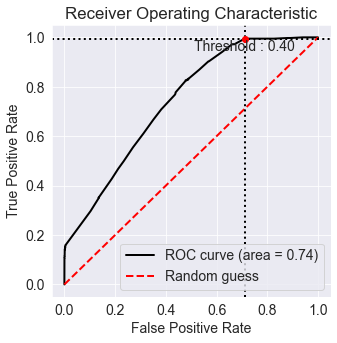

In [507]:
y_pred = xgb_tuned.predict_proba(X_train)[:,1]
bc = BinaryClassification(y_train, y_pred,labels=["Class 1", "Class 2"],threshold=0.4)

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve(threshold=0.4)
plt.show()

In [515]:
xgb_tuned_model_train_perf_threshold = model_performance_classification_sklearn(xgb_tuned,X_train,y_train,threshold=0.4,Type='Train') 
xgb_tuned_model_test_perf_threshold = model_performance_classification_sklearn(xgb_tuned,X_test,y_test,threshold=0.4,Type='Test') 
print(xgb_tuned_model_train_perf_threshold)
print(xgb_tuned_model_test_perf_threshold)

       Accuracy    Recall  Precision      F1
Train  0.348354  0.994885   0.131375  0.2321
      Accuracy    Recall  Precision        F1
Test  0.336482  0.946108   0.124116  0.219444


<AxesSubplot:>

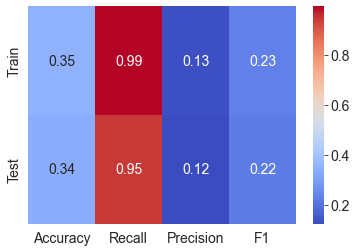

In [516]:
sns.heatmap(pd.concat([xgb_tuned_model_train_perf_threshold,xgb_tuned_model_test_perf_threshold]),cmap='coolwarm',annot=True)

### Conclusion

**Comparing all models**

In [272]:
# training performance comparison

models_train_comp_df = pd.concat(
    [lr_tuned_perf_train.T,
       lr_perf_train_pr_threshold.T,
       
        rf_tuned_model_train_perf.T,
       
        abc_tuned_model_train_perf.T,
      
        gbc_tuned_model_train_perf.T,
     
        xgb_tuned_model_train_perf.T,
        ],
    axis=1,
)

models_train_comp_df.columns = [
    "tuned Logistic regression",
    "threshold tuned Logistic regression",
   
    "Tuned Random Forest",
   
    "Tuned Adaboost Classifier",
   
    "Tuned Gradient Boost Classifier",
    
    "XGBoost Classifier Tuned"]  


In [273]:

models_train_comp_df.columns=[f'{col}_train' for col in models_train_comp_df.columns.values]
print("Training performance comparison:")
models_train_comp_df.T

Training performance comparison:


,Accuracy,Recall,Precision,F1
tuned Logistic regression_train,0.452911,0.805627,0.131250,0.225726
threshold tuned Logistic regression_train,0.279747,0.992327,0.120124,0.214305
Tuned Random Forest_train,0.379241,0.951407,0.132620,0.232791
Tuned Adaboost Classifier_train,0.322278,0.979540,0.125491,0.222480
Tuned Gradient Boost Classifier_train,0.250633,0.989770,0.115764,0.207284
XGBoost Classifier Tuned_train,0.398228,0.971867,0.138383,0.242270


In [274]:
# testing performance comparison


models_test_comp_df = pd.concat(
    [
        lr_tuned_perf_test.T,
        lr_perf_test_pr_threshold.T,
       
        rf_tuned_model_test_perf.T,
        
        abc_tuned_model_test_perf.T,
        
        gbc_tuned_model_test_perf.T,
        
        xgb_tuned_model_test_perf.T,   
        
    ],
    axis=1,
)
models_test_comp_df.columns = [
      "tuned Logistic regression",
      "threshold tuned Logistic regression ",
    
    "Tuned Random Forest",
    
    "Tuned Adaboost Classifier",
    
    "Tuned Gradient Boost Classifier",
   
    "XGBoost Classifier Tuned",
   
]
models_test_comp_df.columns=[f'{col}_test' for col in models_test_comp_df.columns.values]

print("Training performance comparison:")
models_test_comp_df.T
 

Training performance comparison:


,Accuracy,Recall,Precision,F1
tuned Logistic regression_test,0.446871,0.754491,0.123288,0.211943
threshold tuned Logistic regression _test,0.285714,0.958084,0.117388,0.209150
Tuned Random Forest_test,0.370720,0.898204,0.125104,0.219619
Tuned Adaboost Classifier_test,0.319953,0.952096,0.122026,0.216327
Tuned Gradient Boost Classifier_test,0.263282,0.982036,0.116395,0.208122
XGBoost Classifier Tuned_test,0.381936,0.910180,0.128378,0.225019


In [275]:
models_all=pd.concat([models_train_comp_df,models_test_comp_df],axis=1)
models_all.T.sort_index().T

,Tuned Adaboost Classifier_test,Tuned Adaboost Classifier_train,Tuned Gradient Boost Classifier_test,Tuned Gradient Boost Classifier_train,Tuned Random Forest_test,Tuned Random Forest_train,XGBoost Classifier Tuned_test,XGBoost Classifier Tuned_train,threshold tuned Logistic regression _test,threshold tuned Logistic regression_train,tuned Logistic regression_test,tuned Logistic regression_train
Accuracy,0.319953,0.322278,0.263282,0.250633,0.370720,0.379241,0.381936,0.398228,0.285714,0.279747,0.446871,0.452911
Recall,0.952096,0.979540,0.982036,0.989770,0.898204,0.951407,0.910180,0.971867,0.958084,0.992327,0.754491,0.805627
Precision,0.122026,0.125491,0.116395,0.115764,0.125104,0.132620,0.128378,0.138383,0.117388,0.120124,0.123288,0.131250
F1,0.216327,0.222480,0.208122,0.207284,0.219619,0.232791,0.225019,0.242270,0.209150,0.214305,0.211943,0.225726


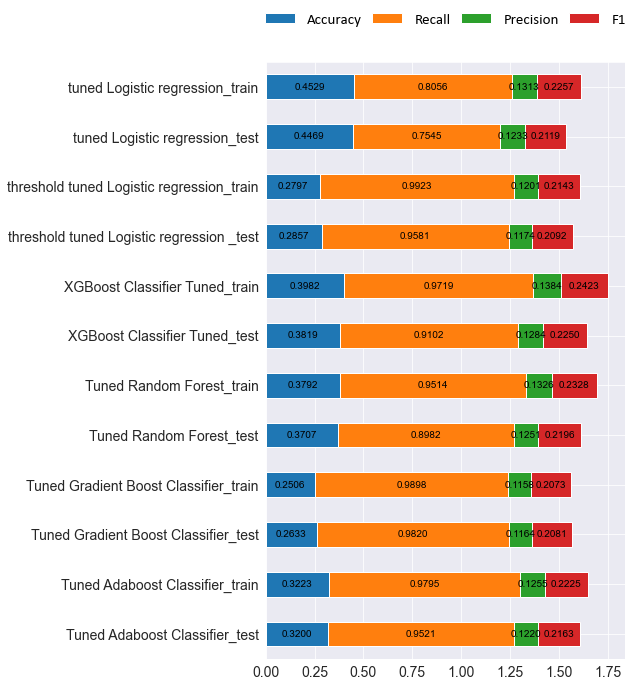

In [276]:
ax=models_all.T.sort_index().plot.barh(stacked=True,figsize=(9,9))
plt.tight_layout()
plt.tight_layout()
legend = plt.legend(loc='center',
       frameon=False,
       bbox_to_anchor=(0., 1.02, 1., .102), 
       mode='expand', 
       ncol=4, 
       borderaxespad=-.46,
       prop={'size': 15, 'family':'Calibri'})

for text in legend.get_texts():
    plt.setp(text, color='black') # legend font color
for p in ax.patches:
    
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    
    ax.text(x+width/2, 
            y+height/2, 
            '{:.4f}'.format(width), 
            horizontalalignment='center', 
            verticalalignment='center',
            color='black',
            fontsize=10,
            )
plt.savefig('boosting.png',tight=True)

# Result and Conclusion

### Important features of the final model

In [45]:
def plot_feature_importances(df, threshold = 0.9,num=15):
    """
    Plots 15 most important features and the cumulative importance of features.
    num by default is 15 you can change it 
    Prints the number of features needed to reach threshold cumulative importance.
    
    Parameters
    --------
    df : dataframe
        Dataframe of feature importances. Columns must be feature and importance
    threshold : float, default = 0.9
        Threshold for prining information about cumulative importances
        
    Return
    --------
    df : dataframe
        Dataframe ordered by feature importances with a normalized column (sums to 1)
        and a cumulative importance column
    
    """

    plt.rcParams['font.size'] = 14
    
    # Sort features according to importance
    df = df.sort_values('importance', ascending = False).reset_index()
    
    # Normalize the feature importances to add up to one
    df['importance_normalized'] = df['importance'] / df['importance'].sum()
    df['cumulative_importance'] = np.cumsum(df['importance_normalized'])

    # Make a horizontal bar chart of feature importances
    plt.figure(figsize = (10, 6))
    ax = plt.subplot()
    
    # Need to reverse the index to plot most important on top
    ax.barh(list(reversed(list(df.index[:num]))), 
            df['importance_normalized'].head(num), 
            align = 'center', edgecolor = 'k')
    
    # Set the yticks and labels
    ax.set_yticks(list(reversed(list(df.index[:num]))))
    ax.set_yticklabels(df['feature'].head(num))
    
    # Plot labeling
    plt.xlabel('Normalized Importance'); plt.title('Feature Importances')
    plt.show()
    
    # Cumulative importance plot
    plt.figure(figsize = (8, 6))
    plt.plot(list(range(len(df))), df['cumulative_importance'], 'r-')
    plt.xlabel('Number of Features'); plt.ylabel('Cumulative Importance'); 
    plt.title('Cumulative Feature Importance');
    plt.show();
    
    importance_index = np.min(np.where(df['cumulative_importance'] > threshold))
    print('%d features required for %0.2f of cumulative importance' % (importance_index + 1, threshold))
    
    return df

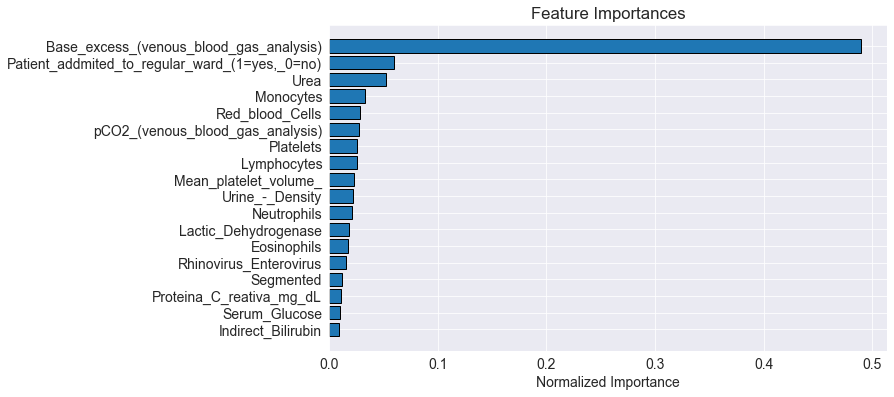

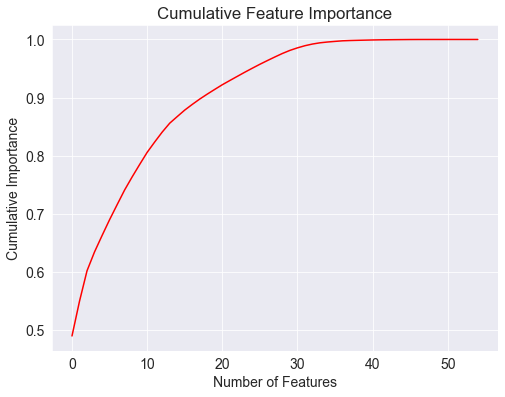

19 features required for 0.90 of cumulative importance


In [46]:
imp=pd.DataFrame({'importance':gbc_tuned.feature_importances_,'feature':gbc_tuned.feature_names_in_.tolist()})
sorted_featurs=plot_feature_importances(imp, threshold = 0.90,num=18)

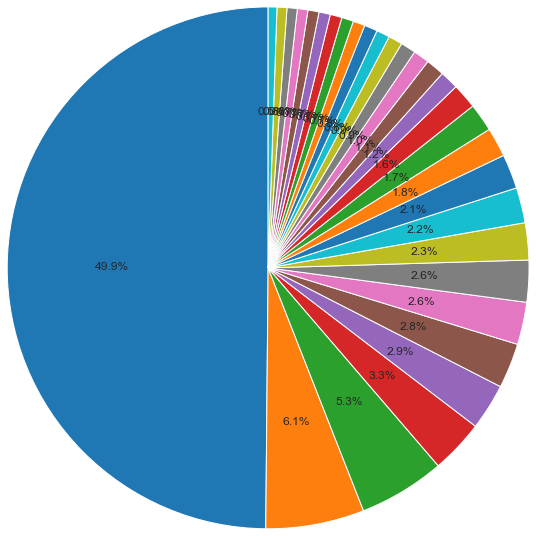

In [90]:
pieplot=sorted_featurs.set_index('feature')[:30]['importance_normalized'].sort_values(ascending=False).plot.pie(fontsize=12, labels=None,legend=False,
                                                         radius=3,startangle=90,autopct='%1.1f%%')

#pieplot.set_xticklabels('')

Text(0, 0.5, '')

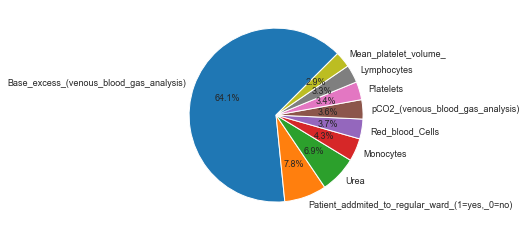

In [60]:
pieplot=sorted_featurs.set_index('feature')[:9].plot.pie(y='importance_normalized',fontsize=9,legend=False,
                                                         startangle=45,autopct='%1.1f%%')

pieplot.set_ylabel('')

Text(0, 0.5, '')

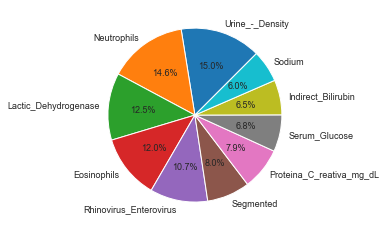

In [59]:
pieplot=sorted_featurs.set_index('feature')[9:19].plot.pie(y='importance_normalized',fontsize=9,startangle=45
                                                           ,legend=False,autopct='%1.1f%%')
pieplot.set_ylabel('')

Text(0, 0.5, '')

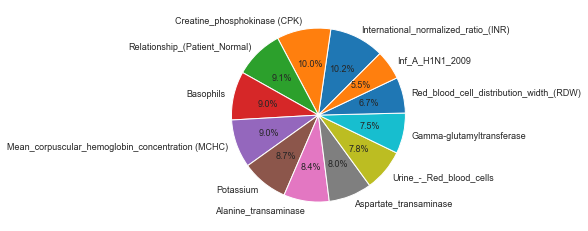

In [91]:
pieplot=sorted_featurs.set_index('feature')[19:31].plot.pie(y='importance_normalized',fontsize=9,startangle=45
                                                           ,legend=False,autopct='%1.1f%%')
pieplot.set_ylabel('')

# shap to evaluate the results

In [92]:
# Fits the explainer
explainer = shap.Explainer(gbc_tuned.predict, X_test)
# Calculates the SHAP values - It takes some time
shap_values = explainer(X_test)


Permutation explainer: 1695it [07:08,  3.86it/s]                          


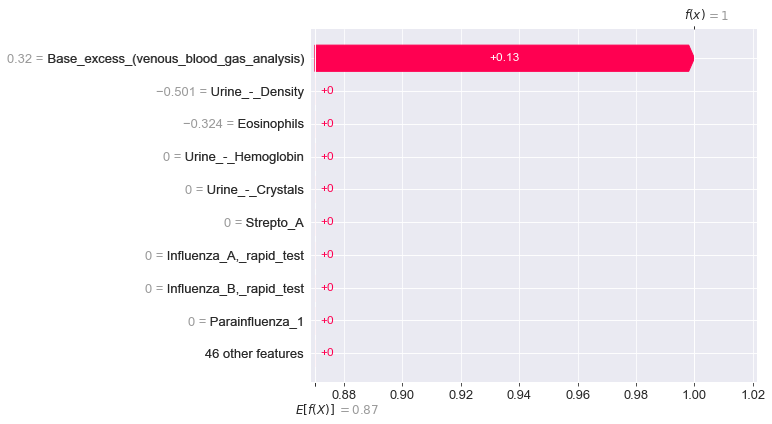

In [93]:

shap.plots.waterfall(shap_values[0])